# kickstarter project

Introduction:
* Why do some kickstarter campaigns succede whereas others don't? What factors play important roles in the funds that kickstarter campaigns raise? In this project, 30,000 kickstarter campaigns will be examined, to generate a better idea between the relationship of different parameters and the outcomes.

Source:
* The data was downloaded as a csv file from the kaggle dataset: "Kickstarter projects
More than 300,000 kickstarter projects". 
* Campaigns ended in as early as May 2009, and as late as March, 2013.

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

In [94]:
df = pd.read_csv("ks-projects-201801.csv")
df = df.sort_values(by=["deadline"], ascending=True).reset_index(drop=True)
df = df.iloc[:1000, :]
del(df["usd pledged"], df["pledged"], df["goal"], df["currency"])
df = df.rename(columns={"category":"sub_category", "usd_pledged_real":"pledged", "usd_goal_real":"goal"})
df.fillna(value=0)
df.head(100)

,ID,name,sub_category,main_category,deadline,launched,state,backers,country,pledged,goal
0,1703704063,drawing for dollars,Illustration,Art,2009-05-03,2009-04-24 21:52:03,successful,3,US,35.00,20.0
1,2089078683,New York Makes a Book!!,Journalism,Journalism,2009-05-16,2009-04-28 13:55:41,successful,110,US,3329.00,3000.0
2,813230527,Sponsor Dereck Blackburn (Lostwars) Artist in ...,Rock,Music,2009-05-16,2009-04-29 05:26:32,failed,2,US,15.00,300.0
3,1147015301,"""All We Had"" Gets Into Cannes -- $10 or More G...",Documentary,Film & Video,2009-05-20,2009-04-30 22:10:30,failed,4,US,40.00,300.0
4,199916122,Mr. Squiggles,Illustration,Art,2009-05-22,2009-05-12 23:39:58,failed,0,US,0.00,30.0
5,1622952265,Pantshirts,Fashion,Fashion,2009-05-26,2009-04-27 14:10:39,failed,10,US,387.00,1900.0
6,266044220,Help me write my second novel.,Fiction,Publishing,2009-05-29,2009-04-29 02:58:50,successful,18,US,563.00,500.0
7,830477146,Web Site for Short Horror Film,Shorts,Film & Video,2009-05-29,2009-04-29 02:04:21,failed,3,US,41.00,200.0
8,1753686817,Help Me Open a Publishing House for Young Authors,Publishing,Publishing,2009-05-29,2009-05-06 15:27:19,failed,1,US,100.00,3000.0
9,888658718,samcclure.com - a wine and food blog (Canceled),Food,Food,2009-05-31,2009-05-04 22:49:04,canceled,2,US,350.00,2000.0


In [25]:
df.columns

Index(['ID', 'name', 'sub_category', 'main_category', 'deadline', 'launched',
       'state', 'backers', 'country', 'pledged', 'goal'],
      dtype='object')

In [26]:
df.count()

ID               1000
name             1000
sub_category     1000
main_category    1000
deadline         1000
launched         1000
state            1000
backers          1000
country          1000
pledged          1000
goal             1000
dtype: int64

In [27]:
df.dtypes

ID                 int64
name              object
sub_category      object
main_category     object
deadline          object
launched          object
state             object
backers            int64
country           object
pledged          float64
goal             float64
dtype: object

In [30]:
df["pledged_to_real"] = df["pledged"] / df["goal"] * 100
df.head()

,ID,name,sub_category,main_category,deadline,launched,state,backers,country,pledged,goal,pledged_to_real
0,1703704063,drawing for dollars,Illustration,Art,2009-05-03,2009-04-24 21:52:03,successful,3,US,35.0,20.0,175.000000
1,2089078683,New York Makes a Book!!,Journalism,Journalism,2009-05-16,2009-04-28 13:55:41,successful,110,US,3329.0,3000.0,110.966667
2,813230527,Sponsor Dereck Blackburn (Lostwars) Artist in ...,Rock,Music,2009-05-16,2009-04-29 05:26:32,failed,2,US,15.0,300.0,5.000000
3,1147015301,"""All We Had"" Gets Into Cannes -- $10 or More G...",Documentary,Film & Video,2009-05-20,2009-04-30 22:10:30,failed,4,US,40.0,300.0,13.333333
4,199916122,Mr. Squiggles,Illustration,Art,2009-05-22,2009-05-12 23:39:58,failed,0,US,0.0,30.0,0.000000


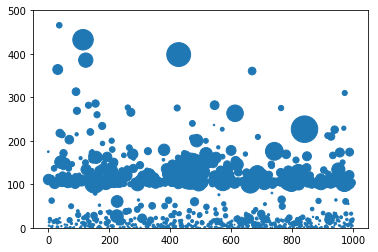

In [57]:
plt.scatter(x=range(len(df["pledged_to_real"])), y=df["pledged_to_real"], s=df["backers"])
plt.ylim(0,500)
plt.show()

In [58]:
list(df)

['ID',
 'name',
 'sub_category',
 'main_category',
 'deadline',
 'launched',
 'state',
 'backers',
 'country',
 'pledged',
 'goal',
 'pledged_to_real']

In [59]:
numeric_columns = [
 'goal',
 'backers',
 'pledged',
 'goal']

for i in numeric_columns:
    print(i)
    print(df[i].corr(df["pledged_to_real"]))

goal
-0.006592116704400914
backers
-0.011476030826838738
pledged
-0.013441286871791578
goal
-0.006592116704400914


# One main category

In [60]:
df["main_category"].value_counts()

Film & Video    230
Music           211
Art             143
Publishing       96
Photography      57
Technology       48
Theater          41
Games            37
Journalism       32
Design           26
Food             24
Fashion          24
Comics           16
Crafts           10
Dance             5
Name: main_category, dtype: int64

In [61]:
film_video_df = df[df["main_category"]=="Film & Video"]
film_video_df.head()

,ID,name,sub_category,main_category,deadline,launched,state,backers,country,pledged,goal,pledged_to_real
3,1147015301,"""All We Had"" Gets Into Cannes -- $10 or More G...",Documentary,Film & Video,2009-05-20,2009-04-30 22:10:30,failed,4,US,40.0,300.0,13.333333
7,830477146,Web Site for Short Horror Film,Shorts,Film & Video,2009-05-29,2009-04-29 02:04:21,failed,3,US,41.0,200.0,20.500000
14,748946786,Dollar Van Demos,Documentary,Film & Video,2009-06-01,2009-05-06 03:50:19,failed,1,US,100.0,2000.0,5.000000
15,1100844465,daily digest,Documentary,Film & Video,2009-06-01,2009-05-04 21:14:28,successful,14,US,700.0,700.0,100.000000
17,2096107260,As The Dust Settles,Film & Video,Film & Video,2009-06-02,2009-05-03 08:37:56,successful,7,US,202.0,200.0,101.000000


In [62]:
len(film_video_df)

230

In [63]:
for i in numeric_columns:
    print(i)
    print(film_video_df[i].corr(film_video_df["pledged_to_real"]))

goal
-0.08905750836046439
backers
0.38054024156511734
pledged
0.3835964016743752
goal
-0.08905750836046439


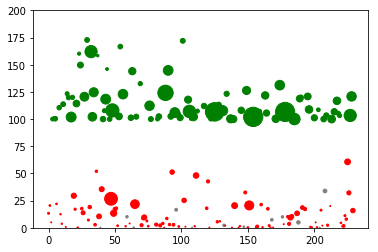

In [95]:
color_df = {"successful":"green", "failed":"red", "canceled":"grey"}

plt.scatter(
    x=range(len(film_video_df["pledged_to_real"])),
    y=film_video_df["pledged_to_real"],
    s=film_video_df["backers"],
    c=film_video_df["state"].apply(lambda x: color_df[x])
)
plt.ylim(0, 200)
plt.show()

# Top performing main category

In [65]:
df["state"].value_counts()

failed        457
successful    427
canceled      116
Name: state, dtype: int64

In [68]:
group_df = df.groupby(["main_category", "state"])

In [87]:
category_count = group_df.count()
category_count

ID  name  sub_category  deadline  launched  \
main_category state                                                     
Art           canceled     21    21            21        21        21   
              failed       58    58            58        58        58   
              successful   64    64            64        64        64   
Comics        failed        7     7             7         7         7   
              successful    9     9             9         9         9   
Crafts        failed        6     6             6         6         6   
              successful    4     4             4         4         4   
Dance         failed        3     3             3         3         3   
              successful    2     2             2         2         2   
Design        canceled      5     5             5         5         5   
              failed       16    16            16        16        16   
              successful    5     5             5         5         5   
Fashion       canceled      2     2             2         2         2   
              failed       19    19            19        19        19   
              successful    3     3             3         3         3   
Film & Video  canceled     24    24            24        24        24   
              failed      117   117           117       117       117   
              successful   89    89            89        89        89   
Food          canceled      5     5             5         5         5   
              failed        7     7             7         7         7   
              successful   12    12            12        12        12   
Games         canceled      4     4             4         4         4   
              failed       16    16            16        16        16   
              successful   17    17            17        17        17   
Journalism    canceled      3     3             3         3         3   
              failed       15    15            15        15        15   
              successful   14    14            14        14        14   
Music         canceled     18    18            18        18        18   
              failed       82    82            82        82        82   
              successful  111   111           111       111       111   
Photography   canceled      8     8             8         8         8   
              failed       24    24            24        24        24   
              successful   25    25            25        25        25   
Publishing    canceled     12    12            12        12        12   
              failed       44    44            44        44        44   
              successful   40    40            40        40        40   
Technology    canceled      9     9             9         9         9   
              failed       24    24            24        24        24   
              successful   15    15            15        15        15   
Theater       canceled      5     5             5         5         5   
              failed       19    19            19        19        19   
              successful   17    17            17        17        17   

                          backers  country  pledged  goal  pledged_to_real  
main_category state                                                         
Art           canceled         21       21       21    21               21  
              failed           58       58       58    58               58  
              successful       64       64       64    64               64  
Comics        failed            7        7        7     7                7  
              successful        9        9        9     9                9  
Crafts        failed            6        6        6     6                6  
              successful        4        4        4     4                4  
Dance         failed            3        3        3     3                3  
              successful        2        2  

In [85]:
category_df = group_df.mean()
category_df

ID     backers      pledged          goal  \
main_category state                                                             
Art           canceled    1.092939e+09    4.142857   231.347143   8665.380952   
              failed      1.033155e+09    7.431034   399.249138   4040.310517   
              successful  1.009597e+09   65.187500  4674.325000   4034.700000   
Comics        failed      9.446323e+08   12.428571   452.714286   7107.142857   
              successful  1.097372e+09  170.666667  7114.812222   4906.666667   
Crafts        failed      8.814340e+08    3.833333   222.666667   1983.333333   
              successful  1.030903e+09   50.500000  3272.250000   3056.250000   
Dance         failed      1.007289e+09    4.666667    72.373333   1266.666667   
              successful  5.747015e+08   44.000000  3467.685000   3250.000000   
Design        canceled    1.079386e+09    3.200000   127.400000  12610.000000   
              failed      1.280281e+09   14.687500   865.625000   6940.000000   
              successful  5.102194e+08   60.200000  2155.870000   1867.800000   
Fashion       canceled    1.163946e+09    1.000000    15.000000   3000.000000   
              failed      1.286085e+09    5.526316   303.263158   4278.684211   
              successful  1.581125e+09   37.666667  3846.330000   3166.666667   
Film & Video  canceled    1.306152e+09    2.791667   228.166667  13941.666667   
              failed      1.023883e+09    8.888889   681.490940  19335.085470   
              successful  1.054748e+09   60.910112  4630.065281   4015.932584   
Food          canceled    9.418177e+08    3.200000   138.400000   7500.000000   
              failed      1.310942e+09    7.714286   357.142857   4292.857143   
              successful  1.053987e+09   54.000000  4614.962500   4195.833333   
Games         canceled    5.956248e+08   23.250000  1028.010000   9800.000000   
              failed      8.960643e+08    4.937500   221.194375   8824.375000   
              successful  1.142988e+09   56.647059  2716.655294   2258.411765   
Journalism    canceled    1.232083e+09    6.666667   576.000000  24233.000000   
              failed      1.207045e+09    3.133333   128.333333   3717.600000   
              successful  1.223370e+09   46.785714  2848.642143   2587.857143   
Music         canceled    1.138776e+09    6.888889   383.813333   6091.611111   
              failed      9.035207e+08    7.780488   358.308415  10602.451220   
              successful  1.105478e+09   77.612613  4872.542973   3817.305495   
Photography   canceled    1.084204e+09    1.875000    43.125000   6118.750000   
              failed      1.097817e+09    7.125000   326.573750   3597.503333   
              successful  1.139949e+09   37.760000  2554.021600   1978.840000   
Publishing    canceled    8.793243e+08    1.583333    55.083333   3279.166667   
              failed      1.152879e+09   10.159091   563.577955   4990.636364   
              successful  1.056430e+09   86.825000  3664.072750   2749.182250   
Technology    canceled    1.055422e+09    7.444444   347.666667   3400.555556   
              failed      8.530078e+08    4.083333   175.778750   4273.875000   
              successful  1.012772e+09   59.200000  4416.605333   3626.600000   
Theater       canceled    1.148508e+09    2.000000   215.000000  27860.000000   
              failed      1.256300e+09    5.631579   278.210526   5952.642105   
              successful  1.052579e+09   35.000000  2915.951176   2724.411765   

                          pledged_to_real  
main_category state                        
Art           canceled           8.339064  
              failed            15.141439  
              successful     16664.435232  
Comics        failed            14.109721  
              successful       151.029169  
Crafts        failed            10.198333  
              successful       119.961039  
Dance         failed            16.568889  
              successful       

(0, 300)

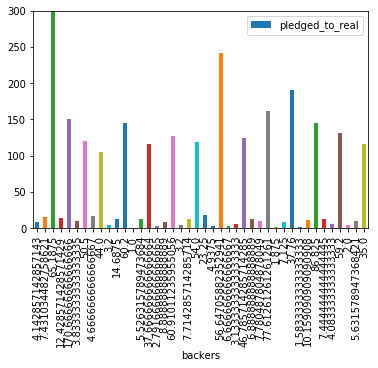

In [84]:
category_df.plot(kind="bar", x="backers", y="pledged_to_real")
plt.ylim(0,300)